### **1. Carregamentos**

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv('infringement_dataset.csv')

### **2. Pré-processamento de dados**

In [95]:
df.shape

(307511, 69)

In [96]:
df.head()

,loan_id,infringed,contract_type,gender,has_own_car,has_own_realty,num_children,annual_income,credit_amount,credit_annuity,...,SK_ID_CURR,avg_days_decision,past_avg_amount_annuity,past_avg_amt_application,past_avg_amt_credit,past_loans_approved,past_loans_refused,past_loans_canceled,past_loans_unused,past_loans_total
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,100002.0,606.000000,9251.775,179055.00,179055.00,1.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,100003.0,1305.000000,56553.990,435436.50,484191.00,3.0,0.0,0.0,0.0,3.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,100004.0,815.000000,5357.250,24282.00,20106.00,1.0,0.0,0.0,0.0,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,100006.0,272.444444,23651.175,272203.26,291695.50,5.0,3.0,1.0,0.0,9.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,100007.0,1222.833333,12278.805,150530.25,166638.75,6.0,0.0,0.0,0.0,6.0


In [97]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [98]:
df.select_dtypes(include=['O']).head()

,contract_type,gender,has_own_car,has_own_realty,income_type,education,family_status,housing_type,occupation_type,organization_type,first_name,last_name,address
0,Cash loans,M,N,Y,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,Robert,Watkins,"PSC 6214, Box 0499\nAPO AE 50653"
1,Cash loans,F,N,N,State servant,Higher education,Married,House / apartment,Core staff,School,Jane,Navarro,"537 Jones Views Suite 234\nWebbton, AR 28006"
2,Revolving loans,M,Y,Y,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government,David,Seagraves,"7418 Brown Rapid Apt. 502\nLake Amber, OK 60478"
3,Cash loans,F,N,Y,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3,Deborah,Tandy,"812 Macias Roads Suite 039\nHelenland, MA 10754"
4,Cash loans,M,N,Y,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion,David,Walker,"093 Laura Overpass Suite 487\nLake Bryanside, ..."


In [99]:
print(df.gender.unique())
print(df.has_own_car.unique())
print(df.has_own_realty.unique())

['M' 'F' 'XNA']
['N' 'Y']
['Y' 'N']


In [100]:
len(df[df.gender=='XNA'])

4

In [101]:
df = df[df.gender!='XNA']

In [102]:
print(df.gender.unique())
print(df.has_own_car.unique())
print(df.has_own_realty.unique())

['M' 'F']
['N' 'Y']
['Y' 'N']


In [103]:
df['gender'] = df['gender'].replace({'M': 1, 'F': 0})
df['has_own_car'] = df['has_own_car'].replace({'Y': 1, 'N': 0})
df['has_own_realty'] = df['has_own_realty'].replace({'Y': 1, 'N': 0})

In [104]:
df.dtypes.head(10)

loan_id             int64
infringed           int64
contract_type      object
gender              int64
has_own_car         int64
has_own_realty      int64
num_children        int64
annual_income     float64
credit_amount     float64
credit_annuity    float64
dtype: object

In [105]:
df1 = df.select_dtypes(include=['int64', 'float64'])

In [106]:
df1.shape

(307507, 59)

In [107]:
df1.nunique()

loan_id                     307507
infringed                        2
gender                           2
has_own_car                      2
has_own_realty                   2
num_children                    15
annual_income                 2548
credit_amount                 5603
credit_annuity               13672
goods_valuation               1002
age                             50
days_employed                12574
car_age                         62
provided_mobilephone             2
provided_workphone               2
provided_homephone               2
mobilephone_reachable            2
provided_email                   2
num_family_members              17
region_rating                    3
score_ext_1                 114583
score_ext_2                 119830
score_ext_3                    814
appendix_a                       2
appendix_b                       2
appendix_c                       2
appendix_d                       2
appendix_e                       2
appendix_f          

Let's drop the Loan_ID column as it is does not provide any useful information

In [108]:
df1.drop(['loan_id'], axis=1, inplace=True)

In [109]:
df1.columns

Index(['infringed', 'gender', 'has_own_car', 'has_own_realty', 'num_children',
       'annual_income', 'credit_amount', 'credit_annuity', 'goods_valuation',
       'age', 'days_employed', 'car_age', 'provided_mobilephone',
       'provided_workphone', 'provided_homephone', 'mobilephone_reachable',
       'provided_email', 'num_family_members', 'region_rating', 'score_ext_1',
       'score_ext_2', 'score_ext_3', 'appendix_a', 'appendix_b', 'appendix_c',
       'appendix_d', 'appendix_e', 'appendix_f', 'appendix_g', 'appendix_h',
       'appendix_i', 'appendix_j', 'appendix_k', 'appendix_l', 'appendix_m',
       'appendix_n', 'appendix_o', 'appendix_p', 'appendix_q', 'appendix_r',
       'appendix_s', 'appendix_t', 'num_req_bureau_hour', 'num_req_bureau_day',
       'num_req_bureau_week', 'num_req_bureau_month', 'num_req_bureau_qrt',
       'num_req_bureau_year', 'SK_ID_CURR', 'avg_days_decision',
       'past_avg_amount_annuity', 'past_avg_amt_application',
       'past_avg_amt_credit',

In [110]:
columns_to_remove = ['region_rating', 'score_ext_1', 'score_ext_2', 'score_ext_3', 'appendix_a', 'appendix_b', 'appendix_c',
                     'appendix_d', 'appendix_e', 'appendix_f', 'appendix_g', 'appendix_h', 'appendix_i', 'appendix_j',
                     'appendix_k', 'appendix_l', 'appendix_m', 'appendix_n', 'appendix_o', 'appendix_p', 'appendix_q',
                     'appendix_r', 'appendix_s', 'appendix_t', 'num_req_bureau_hour', 'num_req_bureau_day', 'num_req_bureau_week',
                     'num_req_bureau_month', 'num_req_bureau_qrt', 'num_req_bureau_year', 'SK_ID_CURR', 'avg_days_decision']
df2 = df1.drop(columns_to_remove, axis=1)

In [111]:
df2.shape

(307507, 26)

In [112]:
df2.nunique()

infringed                        2
gender                           2
has_own_car                      2
has_own_realty                   2
num_children                    15
annual_income                 2548
credit_amount                 5603
credit_annuity               13672
goods_valuation               1002
age                             50
days_employed                12574
car_age                         62
provided_mobilephone             2
provided_workphone               2
provided_homephone               2
mobilephone_reachable            2
provided_email                   2
num_family_members              17
past_avg_amount_annuity     265699
past_avg_amt_application    191737
past_avg_amt_credit         210618
past_loans_approved             26
past_loans_refused              39
past_loans_canceled             46
past_loans_unused               11
past_loans_total                65
dtype: int64

In [113]:
round(df2.isna().sum()/len(df2),3).sort_values(ascending=False)

car_age                     0.660
past_avg_amount_annuity     0.055
past_loans_total            0.054
past_loans_unused           0.054
past_loans_canceled         0.054
past_loans_refused          0.054
past_loans_approved         0.054
past_avg_amt_credit         0.054
past_avg_amt_application    0.054
goods_valuation             0.001
provided_homephone          0.000
num_family_members          0.000
provided_email              0.000
mobilephone_reachable       0.000
infringed                   0.000
gender                      0.000
provided_mobilephone        0.000
days_employed               0.000
age                         0.000
credit_annuity              0.000
credit_amount               0.000
annual_income               0.000
num_children                0.000
has_own_realty              0.000
has_own_car                 0.000
provided_workphone          0.000
dtype: float64

#### Decidindo ficar com car_age, mesmo eliminando todos os valores nulos, resta 34% da base original, ou ~100K linhas!

In [114]:
base_all = df2.dropna()

In [115]:
base_all.shape

(98336, 26)

In [116]:
base_all.nunique()

infringed                       2
gender                          2
has_own_car                     1
has_own_realty                  2
num_children                   12
annual_income                 907
credit_amount                4251
credit_annuity              10939
goods_valuation               634
age                            49
days_employed                9461
car_age                        61
provided_mobilephone            1
provided_workphone              2
provided_homephone              2
mobilephone_reachable           2
provided_email                  2
num_family_members             14
past_avg_amount_annuity     94736
past_avg_amt_application    77928
past_avg_amt_credit         84440
past_loans_approved            25
past_loans_refused             31
past_loans_canceled            37
past_loans_unused               9
past_loans_total               55
dtype: int64

Depois de remover os registos com valores nulos reparamos que a coluna "provided_mobilephone" passa a ser constante, pelo que vamos remover essa coluna.

In [117]:
base_all.drop(["provided_mobilephone"], axis=1, inplace=True)

/tmp/ipykernel_6249/2060784199.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [118]:
# Base somente Homens --> exclui-se a coluna de gênero
base_m = base_all[base_all.gender==1].drop('gender',axis=1)
print(base_m.shape)
# Base somente Mulheres --> exclui-se a coluna de gênero
base_f = base_all[base_all.gender==0].drop('gender',axis=1)
print(base_f.shape)

(55693, 24)
(42643, 24)


#### A distribuição entre homens (56,5%) e mulheres (43,5%) é relativamente balanceada, o que permite fazer comparações entre esses grupos sem muito viés.

### **3. Análise Base Geral**

### 3.1. Primeiras infos PCA

In [119]:
from sklearn.decomposition import PCA

In [120]:
# Inicialize o modelo PCA com o número de componentes desejado (por exemplo, 2 componentes)
pca = PCA(n_components=len(base_all.columns))
pca.fit_transform(base_all)

# Obtenha as proporções de variância explicada
explained_variance = pca.explained_variance_ratio_

# Obtenha os autovalores
eigenvalues = pca.explained_variance_

print("Variância explicada")
print(explained_variance)

print("\nAutovalores")
print(eigenvalues)

Variância explicada
[7.76763379e-01 1.51214279e-01 3.78533146e-02 2.70611748e-02
 5.03179093e-03 1.73394724e-03 2.34241979e-04 1.07872322e-04
 3.36828361e-10 1.95965918e-10 4.92173463e-11 6.78005807e-12
 4.30624191e-12 3.12977374e-12 5.77546238e-13 4.89321262e-13
 3.97588896e-13 3.48776643e-13 1.59596258e-13 1.47888097e-13
 1.35039530e-13 1.82852811e-15 2.80646463e-16 1.08443609e-35
 1.37782499e-42]

Autovalores
[3.27864297e+11 6.38260821e+10 1.59775174e+10 1.14222597e+10
 2.12387021e+09 7.31882333e+08 9.88712698e+07 4.55318622e+07
 1.42171988e+02 8.27153155e+01 2.07741650e+01 2.86179683e+00
 1.81762299e+00 1.32104717e+00 2.43776672e-01 2.06537764e-01
 1.67818421e-01 1.47215242e-01 6.73640345e-02 6.24221330e-02
 5.69988775e-02 7.71804000e-04 1.18458153e-04 4.57729966e-24
 5.81566578e-31]


### 4.2. Scree plot

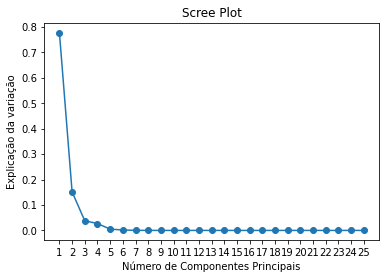

In [121]:
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xticks(np.arange(1, len(explained_variance) + 1, step=1))
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Explicação da variação')
plt.title('Scree Plot')

plt.show()

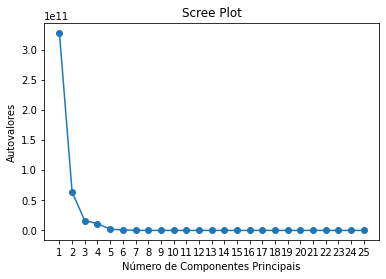

In [122]:
plt.plot(range(1, len(explained_variance) + 1), eigenvalues, marker='o', linestyle='-')
plt.xticks(np.arange(1, len(explained_variance) + 1, step=1))
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Autovalores')
plt.title('Scree Plot')

plt.show()

#### Este segundo é o scree plot em si, pois no eixo Y são representados os autovalores.

#### Portanto, **2 componentes** são suficientes para a explicação de base_all.

### 3.3. Loadings (Variáveis que mais contribuem para os 2 componentes)

In [123]:
# Obtenha os autovetores (vetores próprios)
eigenvectors = pca.components_

# Crie um DataFrame para visualizar os autovetores com os nomes das variáveis originais
eigenvectors_df = pd.DataFrame(eigenvectors, columns=base_all.columns)

# Agora, para cada componente principal, você pode ver como as variáveis originais contribuem para ele.
# Por exemplo, para o primeiro componente principal:
component_1 = eigenvectors_df.iloc[0]
component_2 = eigenvectors_df.iloc[1]

In [124]:
print("Contribuição das variáveis para o primeiro componente principal:")
print(component_1.sort_values(ascending=False))

Contribuição das variáveis para o primeiro componente principal:
credit_amount               7.294786e-01
goods_valuation             6.709602e-01
past_avg_amt_credit         8.016322e-02
past_avg_amt_application    7.665256e-02
annual_income               7.040815e-02
credit_annuity              1.972543e-02
past_avg_amount_annuity     4.853603e-03
age                         2.643587e-06
past_loans_approved         8.103242e-08
num_family_members          3.835946e-08
provided_email              6.313328e-09
provided_workphone          2.484009e-09
mobilephone_reachable       3.924060e-10
has_own_car                -0.000000e+00
provided_homephone         -1.642961e-09
past_loans_unused          -1.711790e-08
infringed                  -1.717437e-08
has_own_realty             -2.149318e-08
num_children               -3.076081e-08
gender                     -3.505534e-08
past_loans_refused         -3.730897e-08
past_loans_total           -9.700362e-08
past_loans_canceled        -1.236

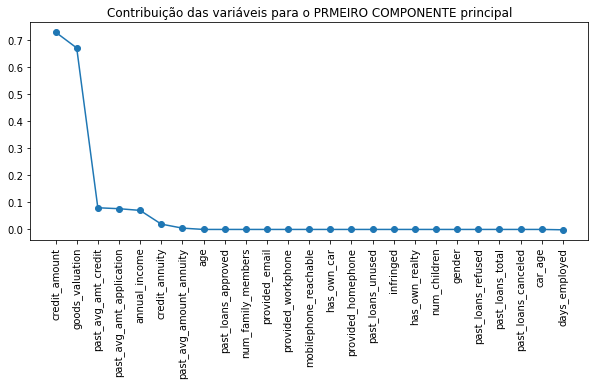

In [125]:
plt.figure(figsize=(10,4))
plt.title('Contribuição das variáveis para o PRMEIRO COMPONENTE principal')
plt.plot(component_1.sort_values(ascending=False), marker='o', linestyle='-')
plt.xticks(rotation=90)

plt.show()

In [126]:
print("Contribuição das variáveis para a segunda componente principal:")
print(component_2.sort_values(ascending=False))

Contribuição das variáveis para a segunda componente principal:
past_avg_amt_credit         7.218735e-01
past_avg_amt_application    6.735548e-01
annual_income               1.007823e-01
past_avg_amount_annuity     3.272615e-02
days_employed               1.007932e-02
credit_annuity              6.164102e-04
age                         5.291846e-06
past_loans_total            2.703747e-06
past_loans_canceled         1.529956e-06
past_loans_approved         7.653050e-07
past_loans_refused          4.935121e-07
provided_email              7.211425e-08
has_own_realty              4.175831e-08
infringed                   4.921998e-10
has_own_car                 0.000000e+00
mobilephone_reachable      -1.052097e-09
provided_workphone         -2.842547e-08
provided_homephone         -2.851474e-08
gender                     -5.844660e-08
past_loans_unused          -8.502604e-08
num_family_members         -1.147462e-07
num_children               -1.607304e-07
car_age                    -3.8457

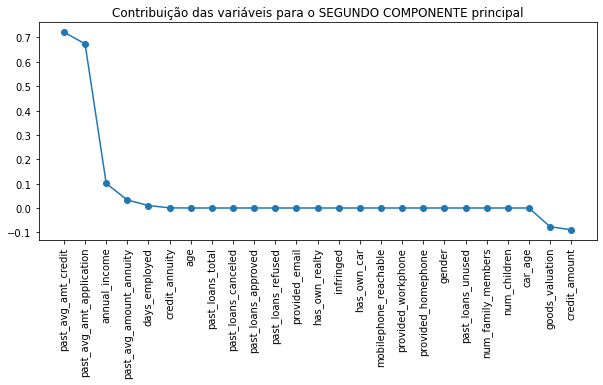

In [127]:
plt.figure(figsize=(10,4))
plt.title('Contribuição das variáveis para o SEGUNDO COMPONENTE principal')
plt.plot(component_2.sort_values(ascending=False), marker='o', linestyle='-')
plt.xticks(rotation=90)

plt.show()

#### Coincidentemente, as duas variáveis que mais explicam o PRIMEIRO COMPONENTE (goods_valuation e credit_amount) são os que menos explicam o SEGUNDO COMPONENTE... - se mencionarmos isto na apresentação podemos explicar que isto é esperado, uma vez que o PC2 é "perpendicular" (esta me a faltar a palavra certa) ao PC1

### Resumo dos Loadings

In [128]:
# Trabalhando com apenas 2 componentes
pca = PCA(n_components=2)
pca.fit(base_all)
base_all_pca = pca.transform(base_all)

In [129]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1','PC2'], index=base_all.columns)
round(loadings,3)

,PC1,PC2
infringed,-0.000,0.000
gender,-0.000,-0.000
has_own_car,0.000,-0.000
has_own_realty,-0.000,0.000
num_children,-0.000,-0.000
annual_income,0.070,0.101
credit_amount,0.729,-0.089
credit_annuity,0.020,0.001
goods_valuation,0.671,-0.077
age,0.000,0.000


#### Abaixo, a participação de uma variável em relação às duas! Aqui não é o tamanho do impacto, mas como cada uma delas impacta nas componentes. Por exemplo, loan_id impacta muito mais em PC2 apesar do absoluto dessa var ser quase zero (tabela acima).

In [130]:
norm_loadings = loadings.div(loadings.sum(axis=1), axis=0)
round(norm_loadings,3)

,PC1,PC2
infringed,1.030,-0.030
gender,0.375,0.625
has_own_car,NaN,NaN
has_own_realty,-1.061,2.061
num_children,0.161,0.839
annual_income,0.411,0.589
credit_amount,1.140,-0.140
credit_annuity,0.970,0.030
goods_valuation,1.129,-0.129
age,0.333,0.667


### 3.4. Loading plot

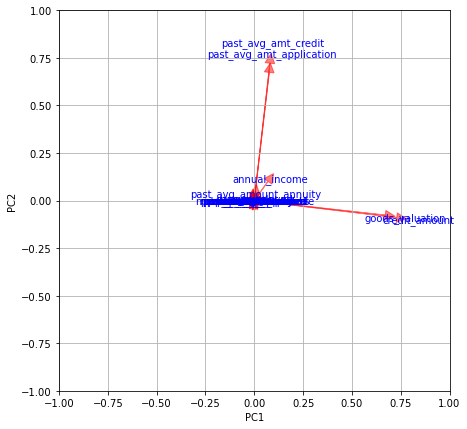

In [131]:
def loading_plot(coeff, labels):
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], head_width = 0.05, head_length = 0.05, color = 'red',alpha = 0.5)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'blue', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid()

fig, ax = plt.subplots(figsize = (7,7))
loading_plot(pca.components_.T, base_all.columns)

#### Percebe-se que as duas variáveis principais que melhor explicam cada componente estão altamente correlacionadas. De um lado, "goods_valuation" com "credit_amount" e, de outro, "past_avg_amt_credit" com "past_avg_amt_application".

#### Além disso, cada um desses pares não se relacionam entre si (cos~0º)...

#### Annual income tem força menor, mas é a 5ªa variável, pois é a 5ª a explicar PC1 e 3ª de PCA. Possui correlação positiva média com as quatro variáveis principais.

## Tentei acima criar uma maneira de selecionar os vetores mais compridos apenas, por ex N=2 N=4... mas como comecei a levar muito tempo, deixei de lado e segui pra entregar, acho que pode-se tentar apenas se houver tempo hábil =)

### 3.5. Score plot

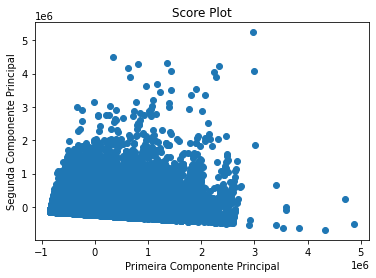

In [132]:
plt.scatter(base_all_pca[:, 0], base_all_pca[:, 1])
plt.xlabel('Primeira Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.title('Score Plot')

plt.show()

#### O score plot mostra que não existe nenhuma relação óbvia entre as duas componentes senão uma relação de perpendicularidade entre ambas.
#### Não existe grandes clusteres bem separados também.
#### Poucos são os pontos de outlier, sendo os principais aqueles que se encontram em X>3 e Y<2 (menos de 1 dúzia de ponto).

### 3.6. Análise de resíduos

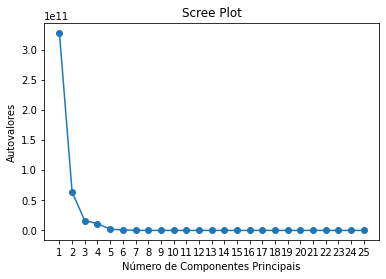

In [133]:
### Retoando o Scree Plot
plt.plot(range(1, len(explained_variance) + 1), eigenvalues, marker='o', linestyle='-')
plt.xticks(np.arange(1, len(explained_variance) + 1, step=1))
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Autovalores')
plt.title('Scree Plot')

plt.show()

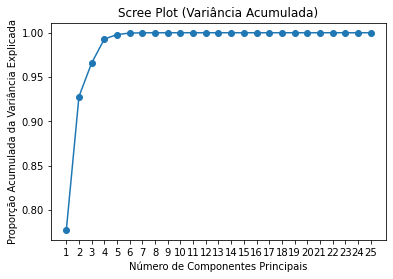

In [134]:
# Calcule os autovalores acumulados
cumulative_eigenvalues = np.cumsum(eigenvalues)

# Calcule a proporção acumulada da variância explicada
explained_variance_ratio = cumulative_eigenvalues / np.sum(eigenvalues)

# Crie o gráfico de Scree Plot com autovalores acumulados
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1, step=1))
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Proporção Acumulada da Variância Explicada')
plt.title('Scree Plot (Variância Acumulada)')

plt.show()

#### Reforça-se que com 1 componente se explica 75% da variação total de X e que, com 2 componentes, 90%.

In [135]:
scores = np.array([base_all_pca[:, 0], base_all_pca[:, 1]])

In [136]:
# Obtenha o número total de pontos
total_points = scores.shape[1]

# Trabalhando com apenas 1% dos dados, porque são muitos
num_points_to_select = total_points // 100

# Gere índices aleatórios para selecionar os pontos
random_indices = np.random.choice(total_points, size=num_points_to_select, replace=False)

# Selecione os pontos correspondentes aos índices gerados aleatoriamente
selected_scores = scores[:, random_indices]

In [137]:
from scipy.spatial.distance import cdist

centroid = np.mean(selected_scores, axis=0)
distancias_mahalanobis = cdist(selected_scores, centroid.reshape(1, -1), 'mahalanobis', VI=np.linalg.inv(np.cov(selected_scores)))

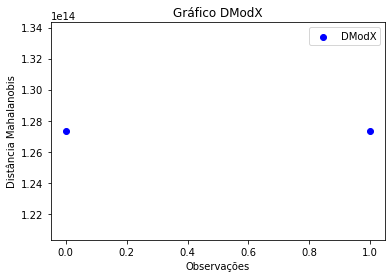

In [138]:
from scipy.spatial import distance

# Calcule as distâncias Mahalanobis dos pontos de dados aos centroides
centroid = np.mean(selected_scores, axis=0)
DModX = [distance.mahalanobis(point, centroid, np.cov(selected_scores.T)) for point in selected_scores]

# Plote o gráfico DModX
plt.scatter(range(len(DModX)), DModX, c='b', label='DModX', marker='o')
plt.xlabel('Observações')
plt.ylabel('Distância Mahalanobis')
plt.legend()
plt.title('Gráfico DModX')
plt.show()

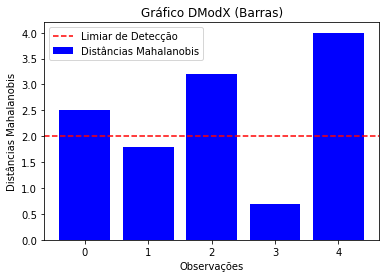

In [139]:
distancias_mahalanobis = [2.5, 1.8, 3.2, 0.7, 4.0]  # Substitua pelos seus próprios valores

# Defina um limiar de detecção (opcional)
limiar = 2.0

# Crie um gráfico de barras das distâncias Mahalanobis
plt.bar(range(len(distancias_mahalanobis)), distancias_mahalanobis, color='b', label='Distâncias Mahalanobis')
plt.axhline(y=limiar, color='r', linestyle='--', label='Limiar de Detecção')
plt.xlabel('Observações')
plt.ylabel('Distâncias Mahalanobis')
plt.legend()
plt.title('Gráfico DModX (Barras)')
plt.show()

### **4. Análise Base Homens - Base Mulheres**

In [140]:
print(f"Male data shape: {base_m.shape}\nFemale data shape: {base_f.shape}")

Male data shape: (55693, 24)
Female data shape: (42643, 24)


### 4.1. Primeiras infos PCA

In [141]:
import plotly.graph_objects as go

In [143]:
# Inicialize o modelo PCA com o número de componentes desejado (por exemplo, 2 componentes)
pca_man = PCA(n_components=len(base_m.columns))
pca_woman = PCA(n_components=len(base_m.columns))
pca_man.fit_transform(base_m)
pca_woman.fit_transform(base_f)

pcs = np.array(range(1,27))

### 4.2. Scree plot

Coloquei vários tipos de gráficos para depois vermos qual preferimos colocar na apresentação

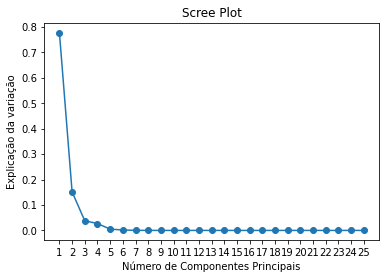

In [144]:
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xticks(np.arange(1, len(explained_variance) + 1, step=1))
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Explicação da variação')
plt.title('Scree Plot')

plt.show()

In [145]:
# Obtenha as proporções de variância explicada
explained_variance_man = pca_man.explained_variance_ratio_
explained_variance_woman = pca_woman.explained_variance_ratio_

# Obtenha os autovalores
eigenvalues_man = pca_man.explained_variance_
eigenvalues_woman = pca_woman.explained_variance_

fig = go.Figure(data=[
    go.Bar(name='Man', x=pcs, y=explained_variance_man),
    go.Bar(name='Woman', x=pcs, y=explained_variance_woman)
])
# Change the bar mode
fig.update_layout(barmode='group',
                  plot_bgcolor='white',  
                  xaxis=dict(title='Principal Components'),
                  yaxis=dict(title='Explained variance (0-1)'),
                  width=600, 
                  height=400)
fig.show()

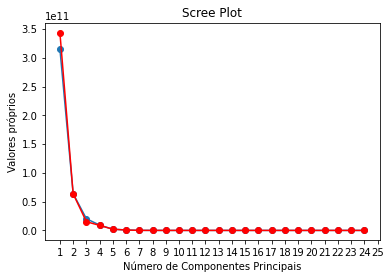

In [146]:
plt.plot(range(1, len(explained_variance_man) + 1), eigenvalues_man, marker='o', linestyle='-')
plt.plot(range(1, len(explained_variance_man) + 1), eigenvalues_woman, marker='o', linestyle='-', color='r')
plt.xticks(np.arange(1, len(explained_variance) + 1, step=1))
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Valores próprios')
plt.title('Scree Plot')

plt.show()

In [147]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=pcs, y=eigenvalues_man, mode='lines+markers', name='Man'))

fig.add_trace(go.Scatter(x=pcs, y=eigenvalues_woman, mode='lines+markers', name='Woman'))

fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

fig.update_layout(
    title='Scree plot',
    xaxis=dict(title='Principal Component', showgrid=True),
    yaxis=dict(title='Eigenvalues', showgrid=True),
    width=600, 
    height=400)

fig.show()

### 4.1. Loadings

In [150]:
eigenvectors_man = pca_man.components_
eigenvectors_woman = pca_woman.components_

eigenvectors_df_man = pd.DataFrame(eigenvectors_man, columns=base_m.columns)
eigenvectors_df_woman = pd.DataFrame(eigenvectors_woman, columns=base_f.columns)

# Agora, para cada componente principal, você pode ver como as variáveis originais contribuem para ele.
# Por exemplo, para o primeiro componente principal:
component_1_man = eigenvectors_df_man.iloc[0]
component_2_man = eigenvectors_df_man.iloc[1]

component_1_woman = eigenvectors_df_woman.iloc[0]
component_2_woman = eigenvectors_df_woman.iloc[1]

In [151]:
print("Contribuição das variáveis para o primeiro componente principal nos homens:")
print(component_1_man.sort_values(ascending=False))

Contribuição das variáveis para o primeiro componente principal nos homens:
credit_amount               7.298855e-01
goods_valuation             6.710674e-01
past_avg_amt_credit         7.628440e-02
annual_income               7.337590e-02
past_avg_amt_application    7.299523e-02
credit_annuity              1.956967e-02
past_avg_amount_annuity     4.547072e-03
age                         2.795287e-06
num_family_members          9.420451e-08
past_loans_approved         6.943295e-08
num_children                9.960281e-09
provided_email              1.849906e-09
provided_homephone          1.479969e-09
provided_workphone          4.148058e-10
mobilephone_reachable       3.668003e-10
has_own_car                -2.220446e-16
past_loans_unused          -1.331046e-08
infringed                  -2.069376e-08
has_own_realty             -2.498900e-08
past_loans_refused         -5.060147e-08
past_loans_total           -1.517895e-07
past_loans_canceled        -1.573105e-07
car_age               

In [152]:
print("Contribuição das variáveis para o primeiro componente principal nas mulheres:")
print(component_1_woman.sort_values(ascending=False))

Contribuição das variáveis para o primeiro componente principal nas mulheres:
credit_amount               7.290179e-01
goods_valuation             6.707900e-01
past_avg_amt_credit         8.347510e-02
past_avg_amt_application    7.981540e-02
annual_income               6.923972e-02
credit_annuity              2.000293e-02
past_avg_amount_annuity     5.169224e-03
age                         2.390620e-06
past_loans_approved         8.301952e-08
provided_email              1.100274e-08
provided_workphone          9.175724e-09
mobilephone_reachable       4.265122e-10
has_own_car                -5.551115e-16
provided_homephone         -4.378880e-09
infringed                  -1.095578e-08
has_own_realty             -2.077710e-08
past_loans_unused          -2.326129e-08
past_loans_refused         -2.531088e-08
num_family_members         -2.565933e-08
past_loans_total           -5.293333e-08
num_children               -7.864876e-08
past_loans_canceled        -8.738068e-08
car_age             

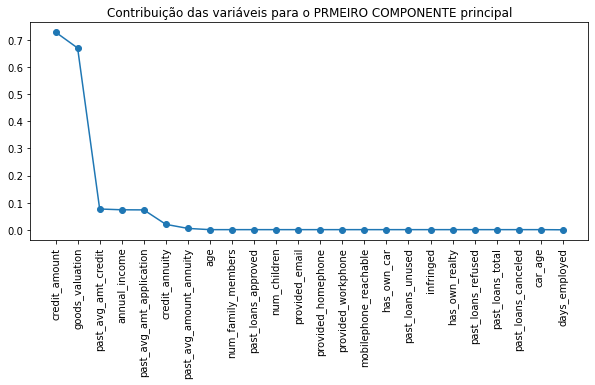

In [156]:
plt.figure(figsize=(10,4))
plt.title('Contribuição das variáveis para o PRMEIRO COMPONENTE principal')
plt.plot(component_1_man.sort_values(ascending=False), marker='o', linestyle='-')
plt.xticks(rotation=90)

plt.show()

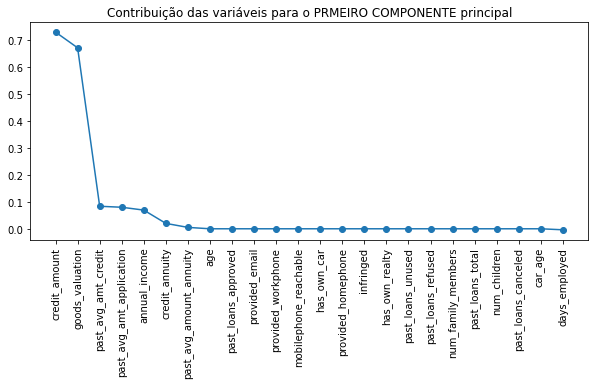

In [157]:
plt.figure(figsize=(10,4))
plt.title('Contribuição das variáveis para o PRMEIRO COMPONENTE principal')
plt.plot(component_1_woman.sort_values(ascending=False), marker='o', linestyle='-')
plt.xticks(rotation=90)

plt.show()

In [158]:
print("Contribuição das variáveis para a segunda componente principal nos homens:")
print(component_2_man.sort_values(ascending=False))

Contribuição das variáveis para a segunda componente principal nos homens:
past_avg_amt_credit         7.195723e-01
past_avg_amt_application    6.746177e-01
annual_income               1.144549e-01
past_avg_amount_annuity     3.255435e-02
days_employed               3.744356e-03
credit_annuity              7.842948e-04
age                         5.163909e-06
past_loans_total            2.414121e-06
past_loans_canceled         1.475520e-06
past_loans_approved         6.056598e-07
past_loans_refused          4.149212e-07
provided_email              6.496349e-08
has_own_realty              4.559014e-08
infringed                   4.915144e-09
has_own_car                 1.040834e-16
mobilephone_reachable      -4.399926e-10
provided_workphone         -1.099520e-08
provided_homephone         -2.496964e-08
num_family_members         -4.420215e-08
past_loans_unused          -8.198025e-08
num_children               -1.114931e-07
car_age                    -3.465692e-06
goods_valuation        

In [159]:
print("Contribuição das variáveis para a segunda componente principal nas mulheres:")
print(component_2_woman.sort_values(ascending=False))

Contribuição das variáveis para a segunda componente principal nas mulheres:
past_avg_amt_credit         7.241851e-01
past_avg_amt_application    6.715783e-01
annual_income               9.154270e-02
past_avg_amount_annuity     3.294475e-02
days_employed               1.591318e-02
credit_annuity              6.253789e-04
age                         5.357246e-06
past_loans_total            3.052646e-06
past_loans_canceled         1.596432e-06
past_loans_approved         9.568880e-07
past_loans_refused          5.909644e-07
provided_email              8.049192e-08
has_own_realty              3.074829e-08
has_own_car                 6.938894e-18
mobilephone_reachable      -1.853223e-09
infringed                  -2.220667e-09
provided_homephone         -3.160574e-08
provided_workphone         -4.446745e-08
past_loans_unused          -9.163895e-08
num_family_members         -1.980891e-07
num_children               -2.208492e-07
car_age                    -4.389919e-06
goods_valuation      

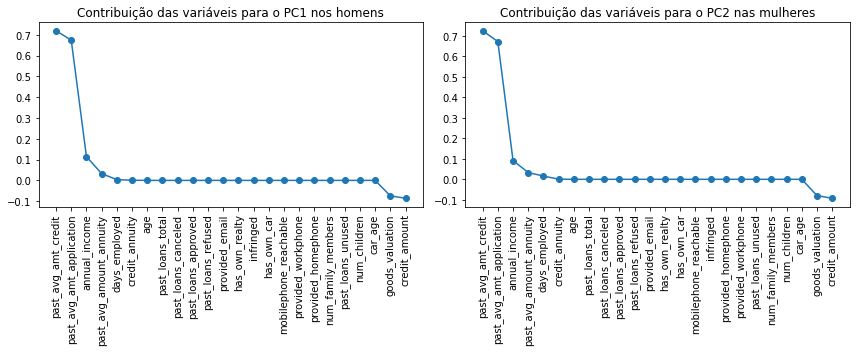

In [178]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].set_title('Contribuição das variáveis para o PC1 nos homens')
axs[0].plot(component_2_man.sort_values(ascending=False), marker='o', linestyle='-')
axs[0].tick_params(axis='x', rotation=90)

axs[1].set_title('Contribuição das variáveis para o PC2 nas mulheres')
axs[1].plot(component_2_woman.sort_values(ascending=False), marker='o', linestyle='-')
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.show()

### Resumo dos Loadings

In [179]:
pca_m = PCA(n_components=2)
pca_m.fit(base_m)
base_all_pca_man = pca.transform(base_m)

pca_f = PCA(n_components=2)
pca_f.fit(base_f)
base_all_pca_woman = pca_f.transform(base_f)

In [180]:
loadings = pd.DataFrame(pca_m.components_.T, columns=['PC1','PC2'], index=base_m.columns)
round(loadings,3)

,PC1,PC2
infringed,-0.000,0.000
has_own_car,0.000,-0.000
has_own_realty,-0.000,0.000
num_children,0.000,-0.000
annual_income,0.073,0.114
credit_amount,0.730,-0.086
credit_annuity,0.020,0.001
goods_valuation,0.671,-0.074
age,0.000,0.000
days_employed,-0.001,0.004


In [181]:
loadings = pd.DataFrame(pca_f.components_.T, columns=['PC1','PC2'], index=base_m.columns)
round(loadings,3)

,PC1,PC2
infringed,-0.000,-0.000
has_own_car,-0.000,0.000
has_own_realty,-0.000,0.000
num_children,-0.000,-0.000
annual_income,0.069,0.092
credit_amount,0.729,-0.093
credit_annuity,0.020,0.001
goods_valuation,0.671,-0.079
age,0.000,0.000
days_employed,-0.004,0.016


### 4.4. Loading plot

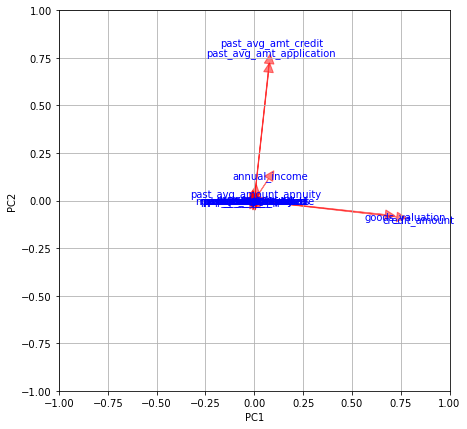

In [182]:
fig, ax = plt.subplots(figsize = (7,7))
loading_plot(pca_m.components_.T, base_m.columns)

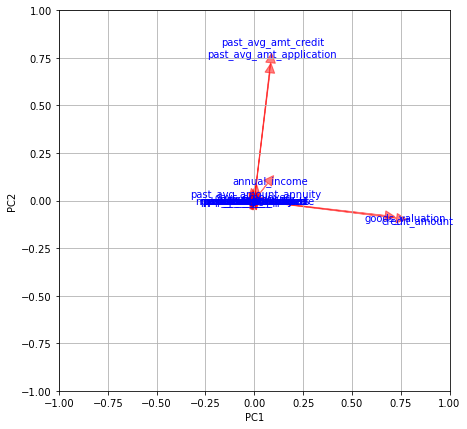

In [183]:
fig, ax = plt.subplots(figsize = (7,7))
loading_plot(pca_f.components_.T, base_f.columns)

### 4.5. Score plot

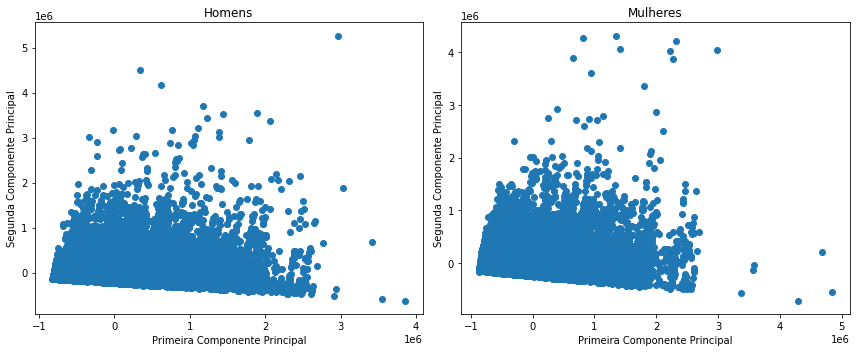

In [170]:
# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for the first subplot
axs[0].scatter(base_all_pca_man[:, 0], base_all_pca_man[:, 1])
axs[0].set_xlabel('Primeira Componente Principal')
axs[0].set_ylabel('Segunda Componente Principal')
axs[0].set_title('Homens')

# Scatter plot for the second subplot
axs[1].scatter(base_all_pca_woman[:, 0], base_all_pca_woman[:, 1])
axs[1].set_xlabel('Primeira Componente Principal')
axs[1].set_ylabel('Segunda Componente Principal')
axs[1].set_title('Mulheres')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Tal como no score plot dos dados todos, conseguimos observar que apenas existe um clusters, havendo alguns outliers com valor de PC1 superior a 3 ou valor de PC2 superior a 2

### 4.6. Análise de resíduos

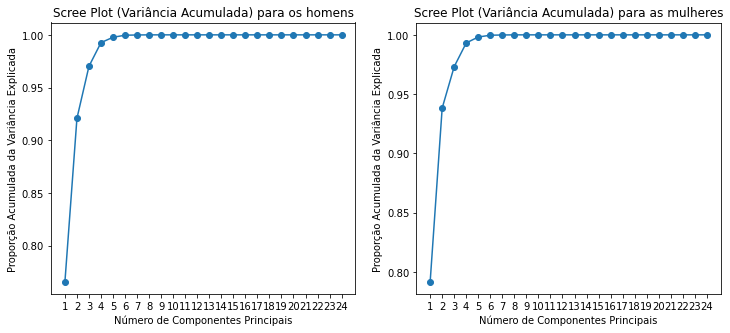

In [187]:
# Calcule os autovalores acumulados
cumulative_eigenvalues_man = np.cumsum(eigenvalues_man)
cumulative_eigenvalues_woman = np.cumsum(eigenvalues_woman)

# Calcule a proporção acumulada da variância explicada
explained_variance_ratio_man = cumulative_eigenvalues_man / np.sum(eigenvalues_man)
explained_variance_ratio_woman = cumulative_eigenvalues_woman / np.sum(eigenvalues_woman)

# Crie o gráfico de Scree Plot com autovalores acumulados
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(range(1, len(explained_variance_ratio_man) + 1), explained_variance_ratio_man, marker='o', linestyle='-')
axs[0].set_xticks(np.arange(1, len(explained_variance_ratio_man) + 1, step=1))
axs[0].set_xlabel('Número de Componentes Principais')
axs[0].set_ylabel('Proporção Acumulada da Variância Explicada')
axs[0].set_title('Scree Plot (Variância Acumulada) para os homens')

axs[1].plot(range(1, len(explained_variance_ratio_woman) + 1), explained_variance_ratio_woman, marker='o', linestyle='-')
axs[1].set_xticks(np.arange(1, len(explained_variance_ratio_woman) + 1, step=1))
axs[1].set_xlabel('Número de Componentes Principais')
axs[1].set_ylabel('Proporção Acumulada da Variância Explicada')
axs[1].set_title('Scree Plot (Variância Acumulada) para as mulheres')

plt.show()

In [192]:
scores_man = np.array([base_all_pca_man[:, 0], base_all_pca_man[:, 1]])
scores_woman = np.array([base_all_pca_woman[:, 0], base_all_pca_woman[:, 1]])

In [193]:
# Obtenha o número total de pontos
total_points_man = scores_man.shape[1]
total_points_woman = scores_woman.shape[1]

# Trabalhando com apenas 1% dos dados, porque são muitos
num_points_to_select = total_points // 100

# Gere índices aleatórios para selecionar os pontos
random_indices_man = np.random.choice(total_points_man, size=num_points_to_select, replace=False)
random_indices_woman = np.random.choice(total_points_woman, size=num_points_to_select, replace=False)

# Selecione os pontos correspondentes aos índices gerados aleatoriamente
selected_scores_man = scores_man[:, random_indices_man]
selected_scores_woman = scores_woman[:, random_indices_woman]

In [208]:
from scipy.spatial.distance import cdist

centroid_man = np.mean(selected_scores_man, axis=0)
centroid_woman = np.mean(selected_scores_woman, axis=0)

distancias_mahalanobis_man = cdist(selected_scores_man, centroid_man.reshape(1, -1), 'mahalanobis', VI=np.linalg.inv(np.cov(selected_scores_man)))
distancias_mahalanobis_woman = cdist(selected_scores_woman, centroid_woman.reshape(1, -1), 'mahalanobis', VI=np.linalg.inv(np.cov(selected_scores_woman)))

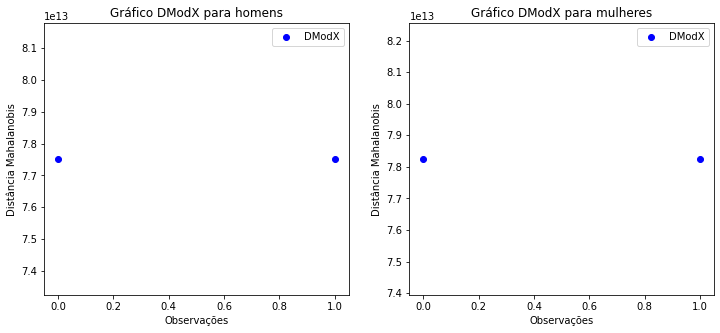

In [203]:
from scipy.spatial import distance

# Calcule as distâncias Mahalanobis dos pontos de dados aos centroides
centroid_man = np.mean(selected_scores_man, axis=0)
centroid_woman = np.mean(selected_scores_woman, axis=0)

DModX_man = [distance.mahalanobis(point, centroid_man, np.cov(selected_scores_man.T)) for point in selected_scores_man]
DModX_woman = [distance.mahalanobis(point, centroid_woman, np.cov(selected_scores_woman.T)) for point in selected_scores_woman]

# Plote o gráfico DModX

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(range(len(DModX_man)), DModX_man, c='b', label='DModX', marker='o')
axs[0].set_xlabel('Observações')
axs[0].set_ylabel('Distância Mahalanobis')
axs[0].legend()
axs[0].set_title('Gráfico DModX para homens')

axs[1].scatter(range(len(DModX_woman)), DModX_woman, c='b', label='DModX', marker='o')
axs[1].set_xlabel('Observações')
axs[1].set_ylabel('Distância Mahalanobis')
axs[1].legend()
axs[1].set_title('Gráfico DModX para mulheres')

plt.show()

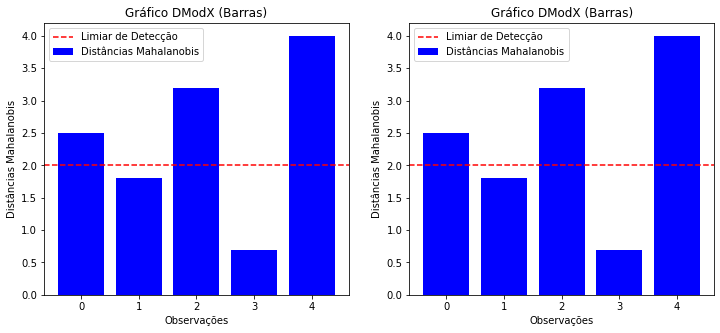

In [211]:
distancias_mahalanobis_man = [2.5, 1.8, 3.2, 0.7, 4.0]  # Substitua pelos seus próprios valores
distancias_mahalanobis_woman = [2.5, 1.8, 3.2, 0.7, 4.0]  # Substitua pelos seus próprios valores

# Defina um limiar de detecção (opcional)
limiar = 2.0

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Crie um gráfico de barras das distâncias Mahalanobis
axs[0].bar(range(len(distancias_mahalanobis_man)), distancias_mahalanobis_man, color='b', label='Distâncias Mahalanobis')
axs[0].axhline(y=limiar, color='r', linestyle='--', label='Limiar de Detecção')
axs[0].set_xlabel('Observações')
axs[0].set_ylabel('Distâncias Mahalanobis')
axs[0].legend()
axs[0].set_title('Gráfico DModX (Barras)')

axs[1].bar(range(len(distancias_mahalanobis_woman)), distancias_mahalanobis_woman, color='b', label='Distâncias Mahalanobis')
axs[1].axhline(y=limiar, color='r', linestyle='--', label='Limiar de Detecção')
axs[1].set_xlabel('Observações')
axs[1].set_ylabel('Distâncias Mahalanobis')
axs[1].legend()
axs[1].set_title('Gráfico DModX (Barras)')

plt.show()

## ver se vale assim separado ou tudo junto com cada gráfico sendo um subplot (o que for tranquilo de fazer)

In [209]:
distancias_mahalanobis_man

array([[nan],
       [nan]])